In [1]:
import os
import sys
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import matplotlib.pyplot as plt
from Naive_DAE import Naive_DAE,Dropout_DAE
import AE_Stats
from load_data_fn import load_data,load_data_no_filter

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, TensorDataset
import importlib


In [18]:
import importlib
importlib.reload(AE_Stats)

<module 'AE_Stats' from '/uscms_data/d3/nswood/Notebooks/ECON_AE_Development/AE_Stats.py'>

In [2]:
n = 80

arr = torch.load('data/TTBAR/ttbar_1_greater_0_sim')
if n > 0:
    for i in range(n):
        arr = torch.vstack([arr,torch.load(f'data/TTBAR/ttbar_{int(n+2)}_greater_0_sim')])



In [3]:
print(f'There are {len(arr)} wafers with sim energy > 0 ')
print(f'mean calcq is: {torch.mean(arr[:,0:48])}')
print(f'max calcq is: {torch.max(arr[:,0:48])}')

There are 892079 wafers with sim energy > 0 
mean calcq is: 16.369503009262633
max calcq is: 10788.0


In [4]:
dt_1 = []
dt_2 = []
dt_3 = []

for a in arr:
    
    if a[-4].item() ==0.: 
        dt_1.append(a)
    elif a[-4].item() ==1.0: 
        dt_2.append(a)
    else:
        dt_3.append(a)
    
dt_1 = torch.vstack(dt_1).float()
dt_2 = torch.vstack(dt_2).float()   
dt_3 = torch.vstack(dt_3).float()   

In [5]:
print(f'{len(dt_1)} wafers of type 0')
print(f'mean calcq: {torch.mean(dt_1[:,0:48])}')
print(f'std calcq: {torch.std(dt_1[:,0:48])}')
mean_dt_1 = torch.mean(dt_1[:,0:48])
std_dt_1 = torch.std(dt_1[:,0:48])

432654 wafers of type 0
mean calcq: 27.600881576538086
std calcq: 51.770050048828125


In [6]:
print(f'{len(dt_2)} wafers of type 0')
print(f'mean calcq: {torch.mean(dt_2[:,0:48])}')
print(f'std calcq: {torch.std(dt_2[:,0:48])}')
mean_dt_2 = torch.mean(dt_2[:,0:48])
std_dt_2 = torch.std(dt_2[:,0:48])

325153 wafers of type 0
mean calcq: 6.9415388107299805
std calcq: 36.54729461669922


In [7]:
print(f'{len(dt_3)} wafers of type 0')
print(f'mean calcq: {torch.mean(dt_3[:,0:48])}')
print(f'std calcq: {torch.std(dt_3[:,0:48])}')
mean_dt_3 = torch.mean(dt_3[:,0:48])
std_dt_3 = torch.std(dt_3[:,0:48])

134272 wafers of type 0
mean calcq: 3.010667085647583
std calcq: 57.36779022216797


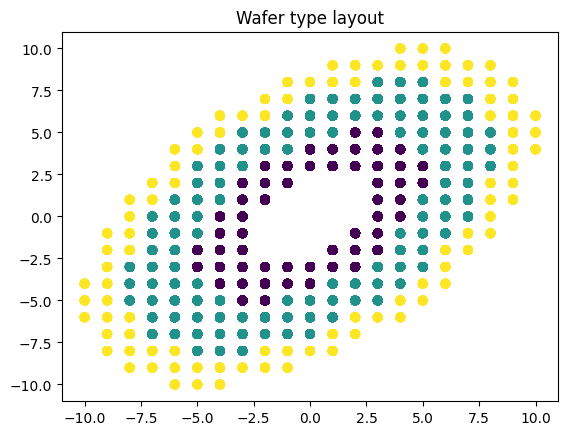

In [9]:
plt.title('Wafer type layout')
plt.scatter(arr[0:50000,-7],arr[0:50000,-6], c = arr[0:50000,-4])
plt.show() 

In [8]:
dt_1[:,0:48] = (dt_1[:,0:48] - torch.mean(dt_1[:,0:48]))/torch.std(dt_1[:,0:48])
dt_2[:,0:48] = (dt_2[:,0:48] - torch.mean(dt_2[:,0:48]))/torch.std(dt_2[:,0:48])
dt_3[:,0:48] = (dt_3[:,0:48] - torch.mean(dt_3[:,0:48]))/torch.std(dt_3[:,0:48])

In [9]:

size_train =100000
size_test = 20000
train_loc = dt_1[0:size_train]
test_loc = dt_1[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=50,
    shuffle=False
)

test_loc_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=50,
    shuffle=False
)

train = dt_1[0:size_train,0:48]
test = dt_1[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=50,
    shuffle=False
)

test_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=50,
    shuffle=False
)

In [10]:
size_train =100000
size_test = 20000
train_loc = dt_2[0:size_train]
test_loc = dt_2[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=50,
    shuffle=False
)

test_loc_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=50,
    shuffle=False
)

train = dt_2[0:size_train,0:48]
test = dt_2[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=50,
    shuffle=False
)

test_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=50,
    shuffle=False
)

In [11]:
size_train =100000
size_test = 20000
train_loc = dt_3[0:size_train]
test_loc = dt_3[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=50,
    shuffle=False
)

test_loc_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=50,
    shuffle=False
)

train = dt_3[0:size_train,0:48]
test = dt_3[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=50,
    shuffle=False
)

test_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=50,
    shuffle=False
)

In [12]:
def AE_MSE(data,pred):
    return torch.mean(torch.sum((data-pred)**2,dim=1))

def AE_MAE(data,pred):
    return torch.mean(torch.sum(torch.abs(data-pred),dim=1))

def weighted_AE_MSE(data, pred):
    return torch.mean(torch.sum((data[:,0:48])**2,dim=1)*torch.sum((data-pred)**2,dim=1))

def dif_weighted_AE_MSE(data, pred,alpha = 1):
    return torch.mean(((torch.sum(data[:,0:48]**2,dim=1)**0.5)*alpha+1)*(torch.sum((data-pred)**2,dim=1)))

def log_dif_weighted_AE_MSE(data, pred,alpha = 1):
    return torch.mean(torch.log((torch.sum(data[:,0:48]**2,dim=1)**0.5)*alpha+1)*(torch.sum((data-pred)**2,dim=1)))

def calcQ_Error(data,pred, mean,std):
    return torch.mean(torch.sum(torch.abs(pred-pred),dim=1))*std+mean
    
def std_error(data,pred):
    return torch.mean(torch.sum(torch.abs(torch.subtract(data,pred)),dim=1))

def new_loss(data,pred,epoch,cut = 15):
    #Reconstruction
    mse = AE_MSE(data,pred)
    if epoch < cut:
        return mse + std_error(data,pred) + torch.log(calcQ_Error(data,pred,mean_dt_1,std_dt_1))
    else:
        #Energy Conservation
        sum_dt, sum_pred = torch.sum(data, dim=1), torch.sum(pred,dim=1)
        sum_error = torch.sum(torch.norm(sum_dt-sum_pred))
        

        return  mse +std_error(data,pred)+ torch.log(calcQ_Error(data,pred,mean_dt_1,std_dt_1))+ 0.1*sum_error*np.min([(epoch-cut)/cut,1])

In [14]:
num_epochs = 100
lr = 0.00045
loss =new_loss

MSE 6.952650547027588
Median 5.122529029846191
Standard Devitaion 9.152998924255371
Average std error 11.675701141357422
Average % Error of Energy Reconstruction 0.0344180166721344


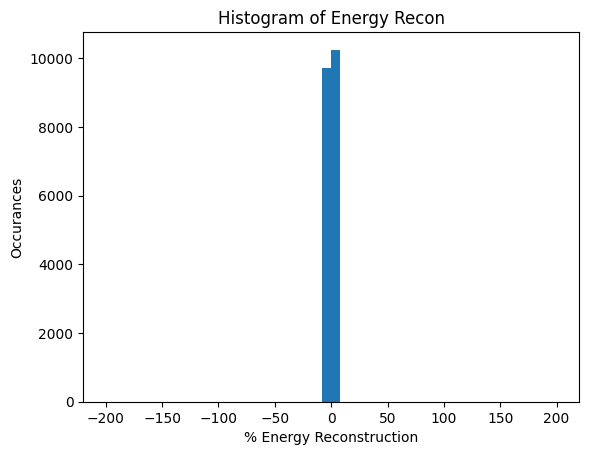

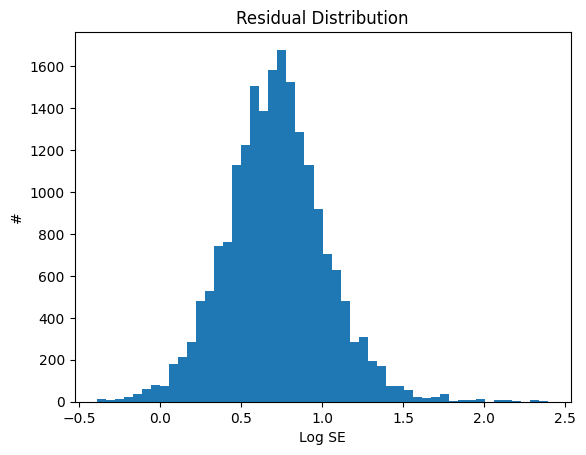

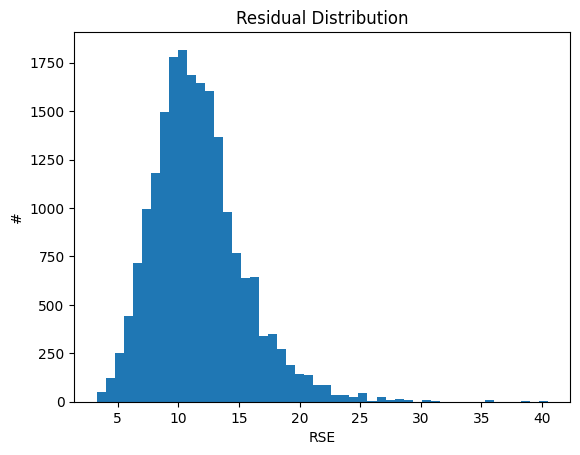

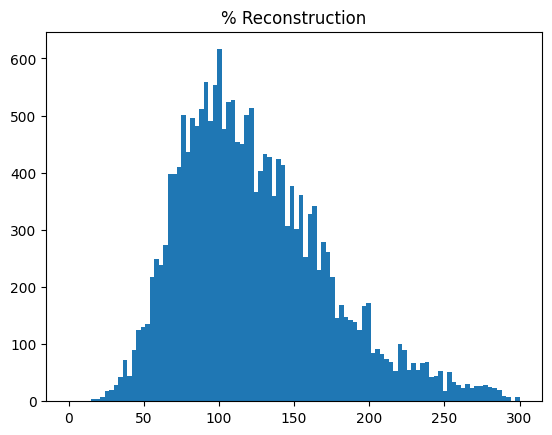

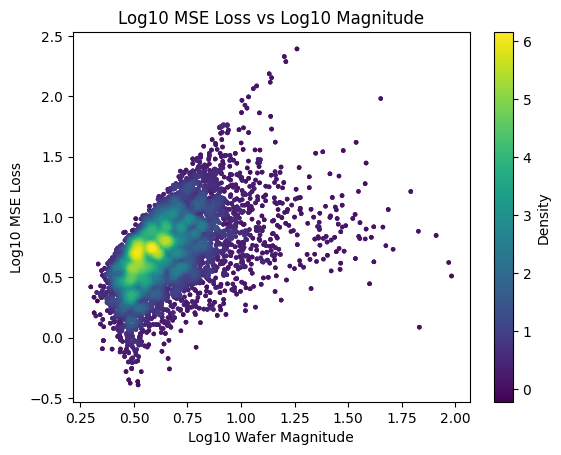

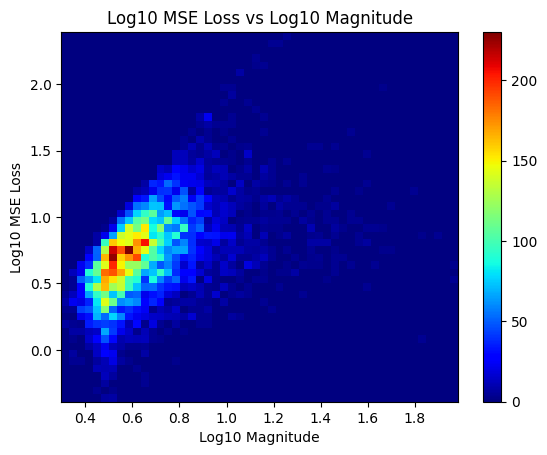

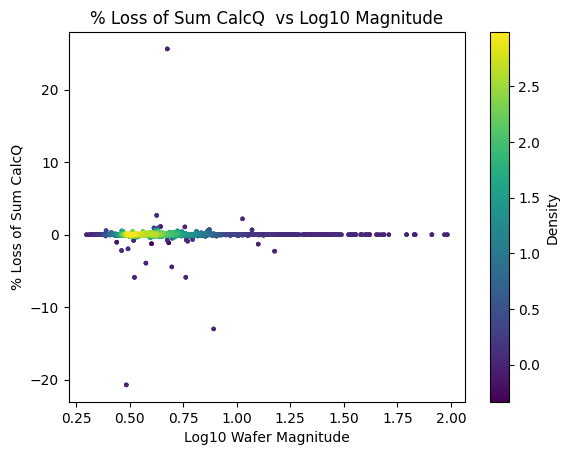

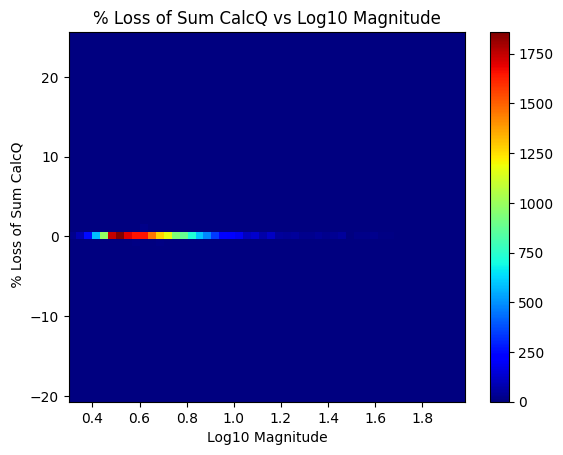

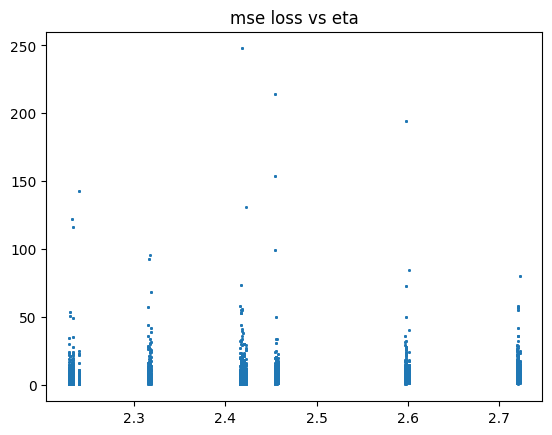

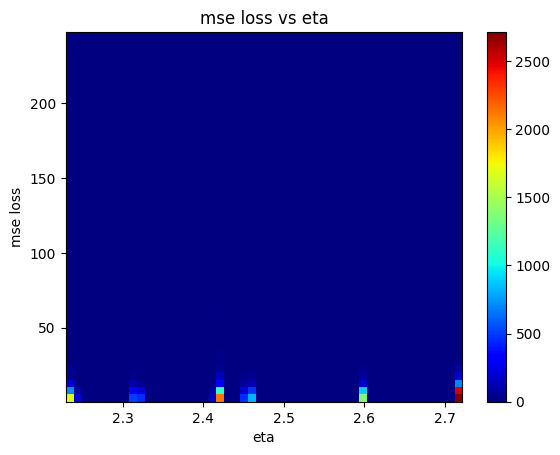

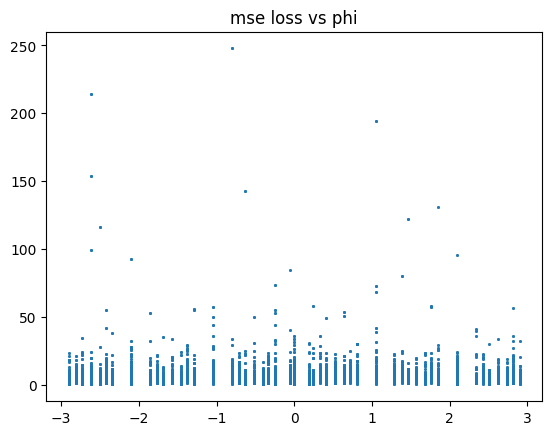

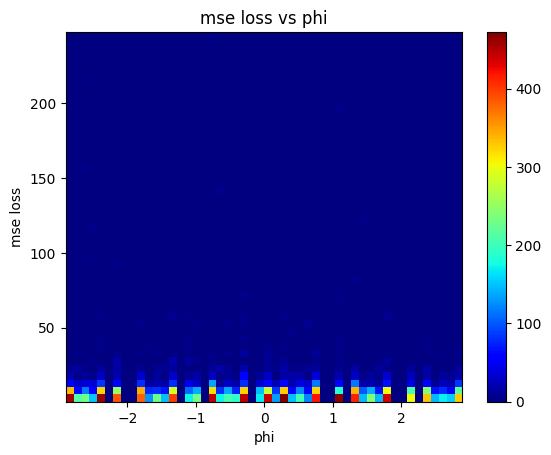

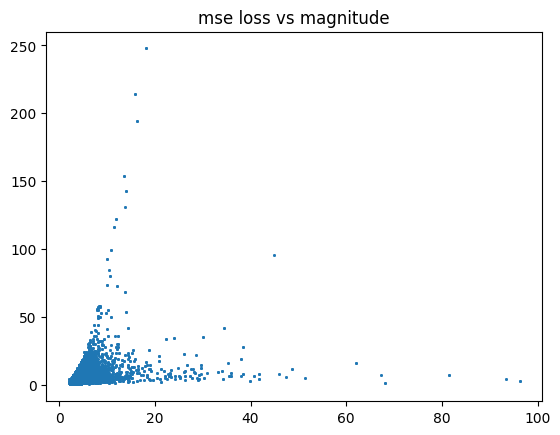

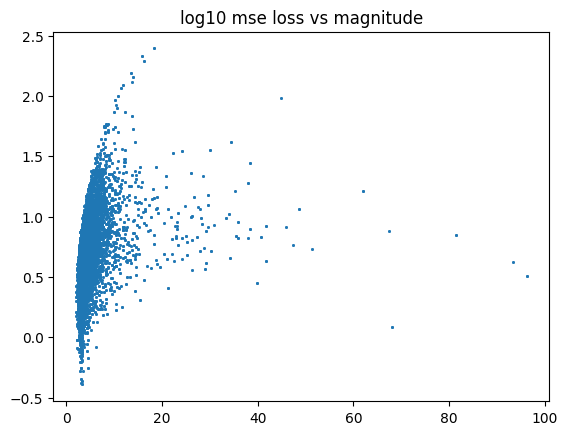

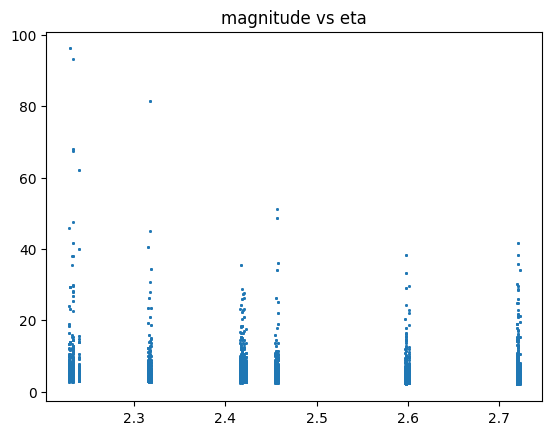

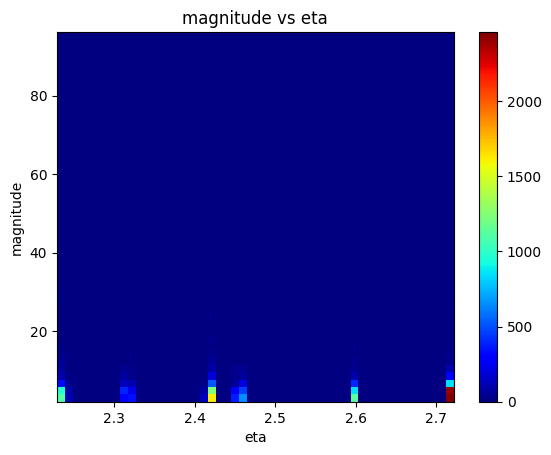

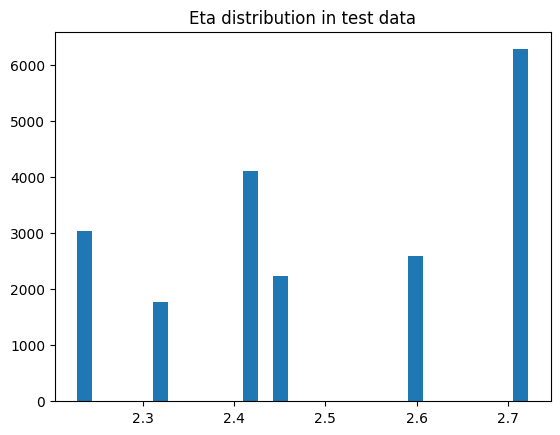

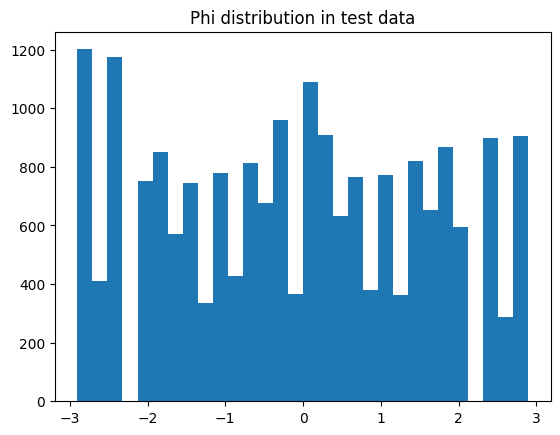

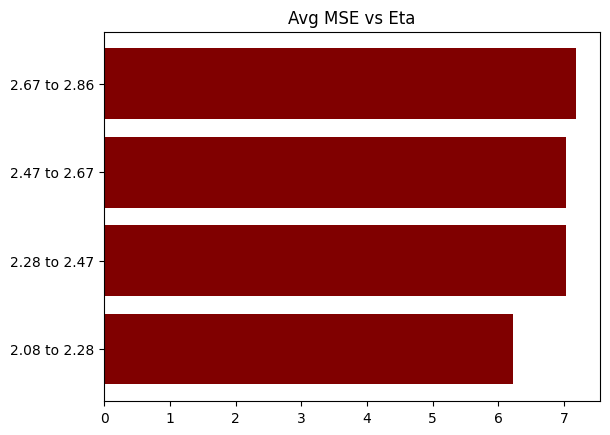

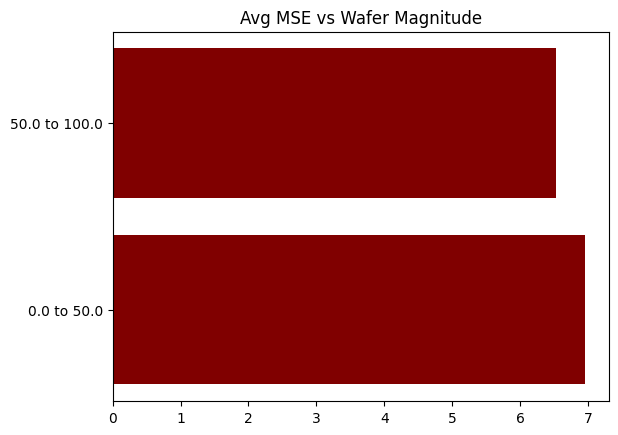

tensor([[ 2.4208, -2.9021,  5.0088,  4.2465,  9.3458],
        [ 2.4208, -2.9021,  9.5540,  3.0937,  7.8577],
        [ 2.4208, -2.9021,  2.8977,  4.2763, 10.1179],
        ...,
        [ 2.2403, -0.6381,  3.5652,  2.6532,  7.6548],
        [ 2.2403, -0.6381,  4.1339,  7.1316, 12.6909],
        [ 2.2403, -0.6381,  3.0976,  1.1644,  4.7338]], grad_fn=<CatBackward0>)

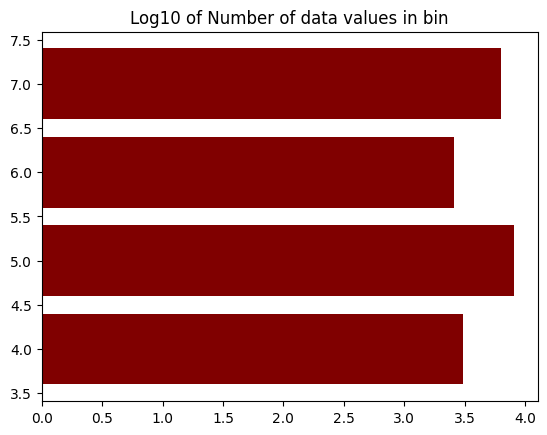

In [15]:
# fine-tune autoencoder
#batch 500

# model_1 = Naive_DAE([48,250,100,16])
model_1 = torch.load('models/dt_1_greater_0_250_100')
test = dt_1[-size_test:,0:48]

optimizer = optim.Adam(model_1.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)
test = dt_1[-size_test:,0:48]

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    break
    losses = []
    
    for i, data_list in enumerate(train_d1_flat):
        model_1.train()
        data = data_list[0]
        v_pred = model_1(data)
        
        batch_loss = loss(data[:,0:48], v_pred,epoch) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = test
    model_1.eval()
    test_pred = model_1(data_test)
    batch_test = loss(data_test[:,0:48], test_pred,epoch)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_1.eval()
AE_Stats.gen_all_stats(model_1(dt_1[-size_test:,0:48]),dt_1[-size_test:,0:48],dt_1[-size_test:])


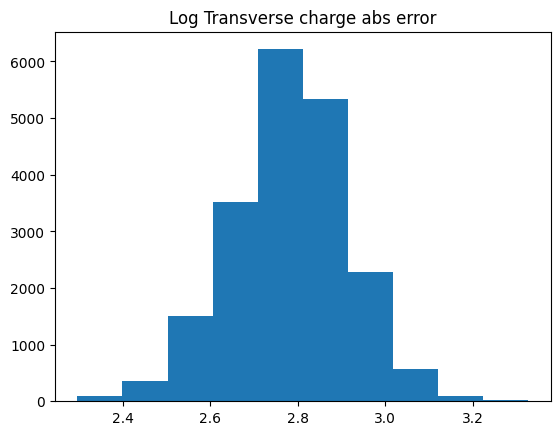

In [21]:
plt.title('Log Transverse charge abs error')
plt.hist(np.log10((torch.sum(torch.abs(model_1(dt_1[-size_test:,0:48])-dt_1[-size_test:,0:48]),dim=1)*std_dt_1+mean_dt_1).detach().numpy()))
plt.show()

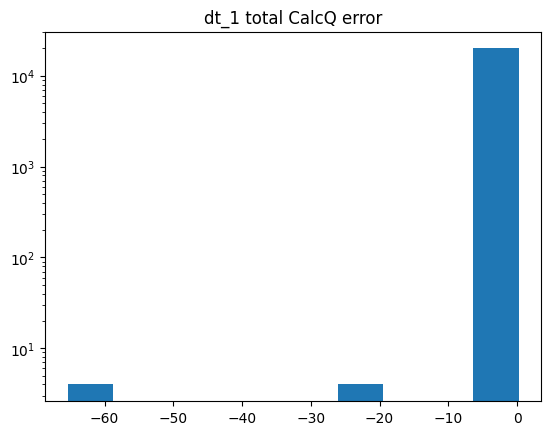

In [40]:
plt.title('dt_1 total CalcQ error')
plt.hist((torch.sum(dt_1[-size_test:,0:48]*std_dt_1+mean_dt_1,dim=1)-torch.sum(model_1(dt_1[-size_test:,0:48])*std_dt_1+mean_dt_1,dim=1)).detach().numpy(),log = True)
plt.show()

In [43]:
print(f'New Loss total: {new_loss(model_1(dt_1[-size_test:,0:48]),dt_1[-size_test:,0:48],epoch =10000)}')
print(f'MSE: {AE_MSE(model_1(dt_1[-size_test:,0:48]),dt_1[-size_test:,0:48]).item()}')
print(f'Average of total wafer calcq error / std: {std_error(model_1(dt_1[-size_test:,0:48]),dt_1[-size_test:,0:48])}')
print(f'Average Error in transverse charge: {calcQ_Error(model_1(dt_1[-size_test:,0:48]),dt_1[-size_test:,0:48], mean_dt_1,std_dt_1)}')

New Loss total: 22.212764739990234
MSE: 6.952650547027588
Average of total wafer calcq error / std: 11.675701141357422
Average Error in transverse charge: 27.600881576538086


MSE 2.7173702716827393
Median 1.3913023471832275
Standard Devitaion 5.747477054595947
Average std error 5.933393955230713
Average % Error of Energy Reconstruction 0.03877674415707588


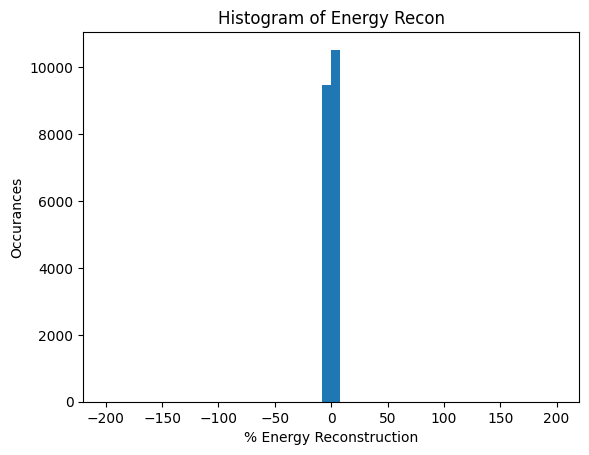

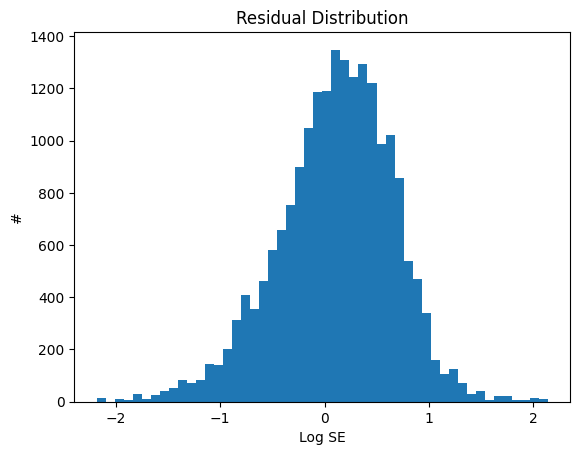

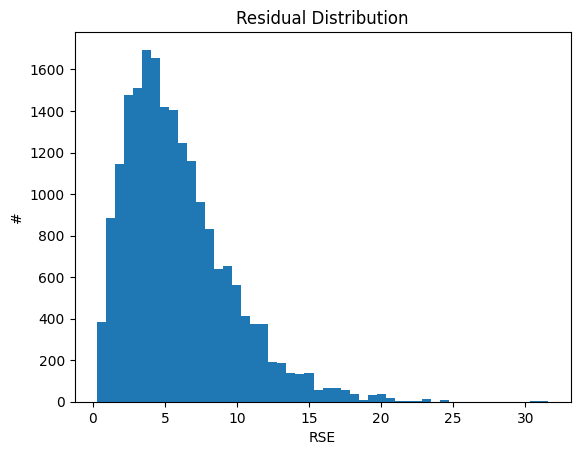

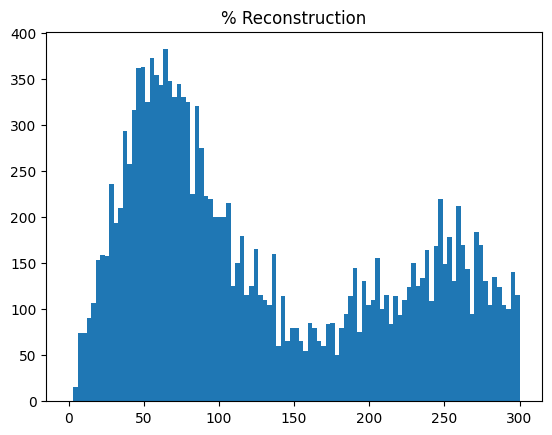

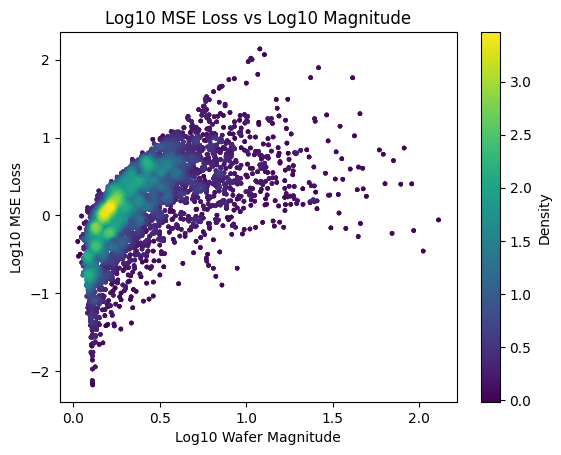

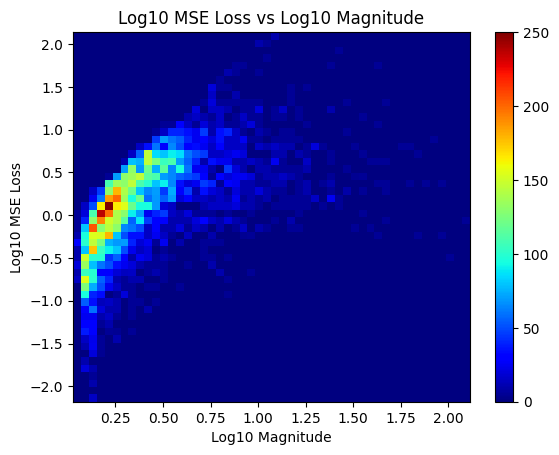

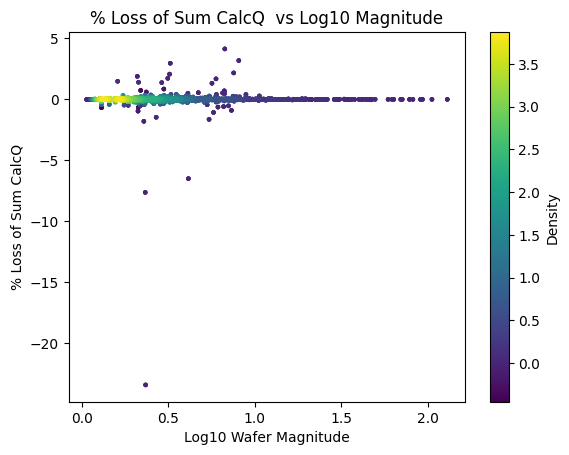

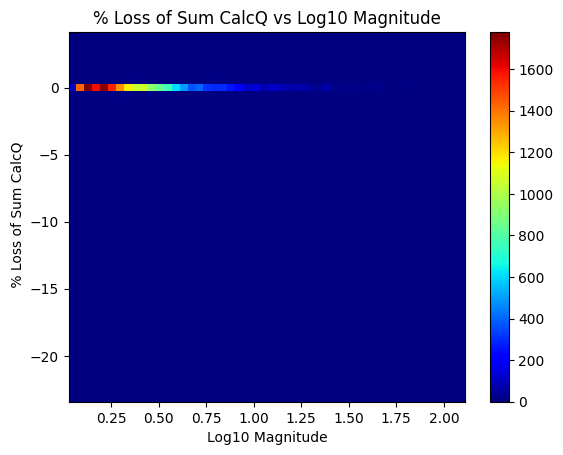

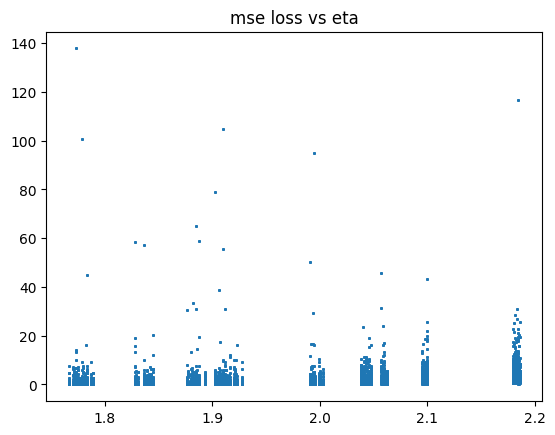

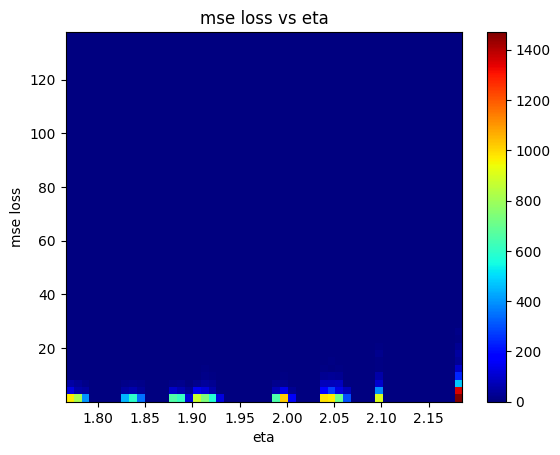

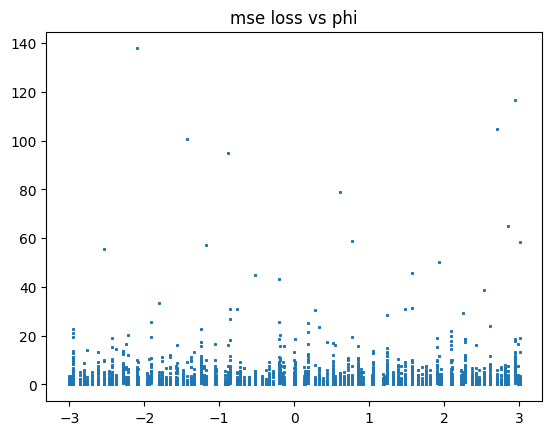

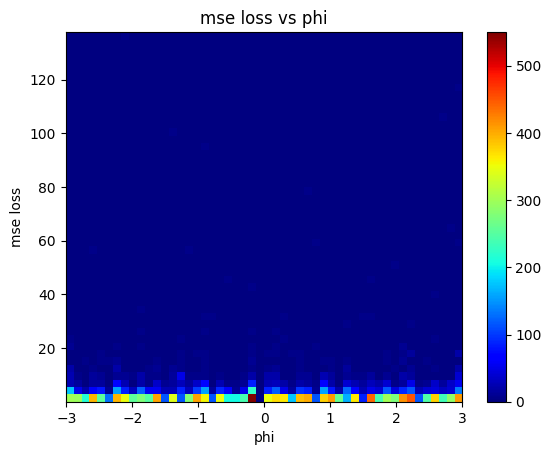

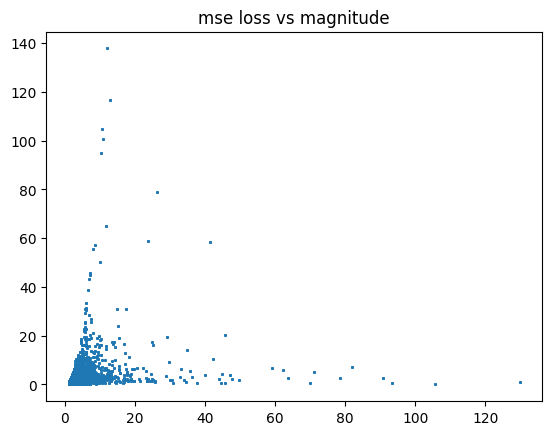

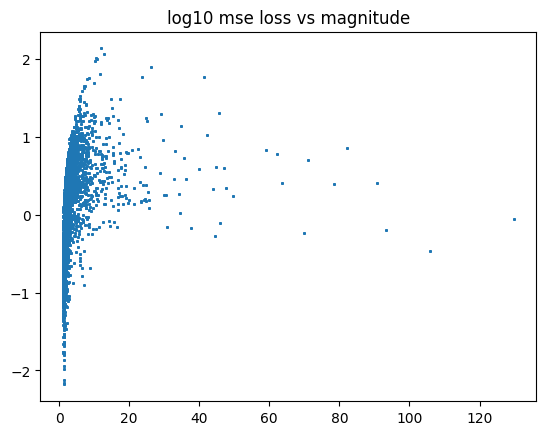

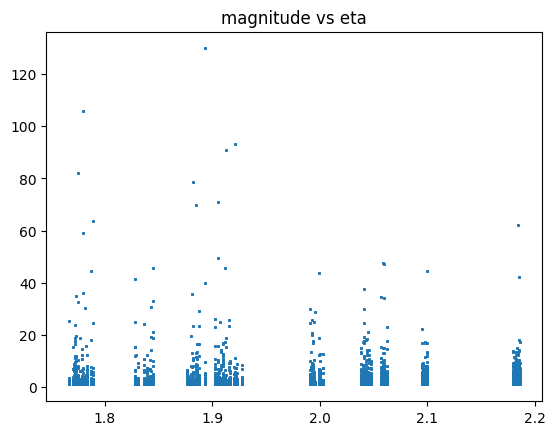

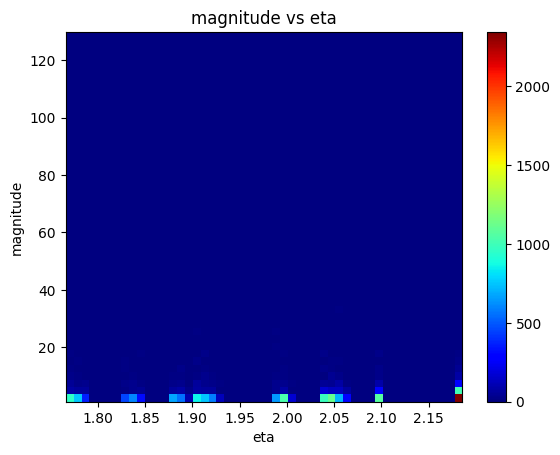

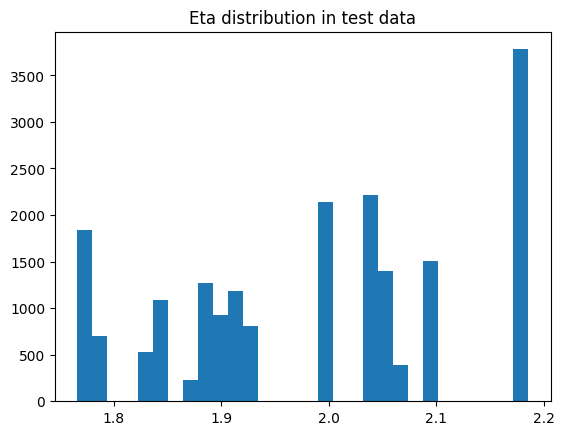

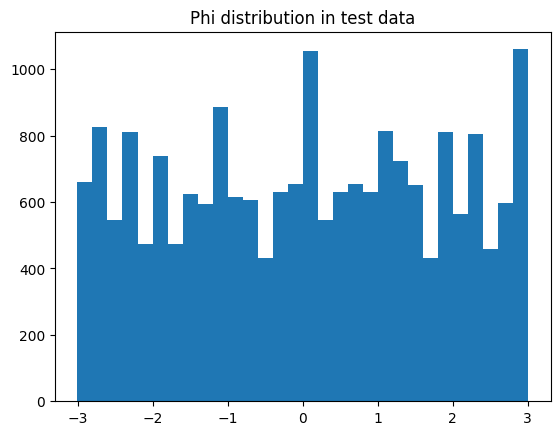

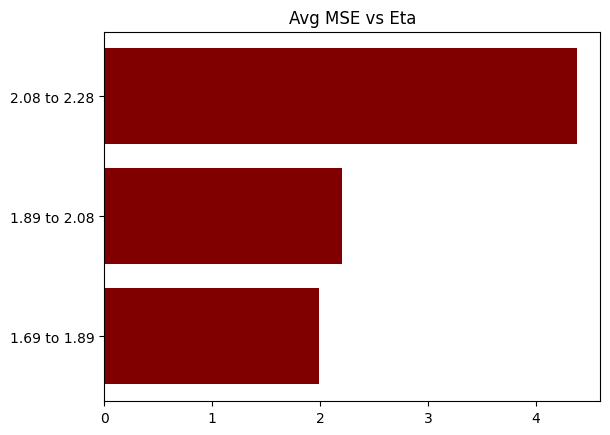

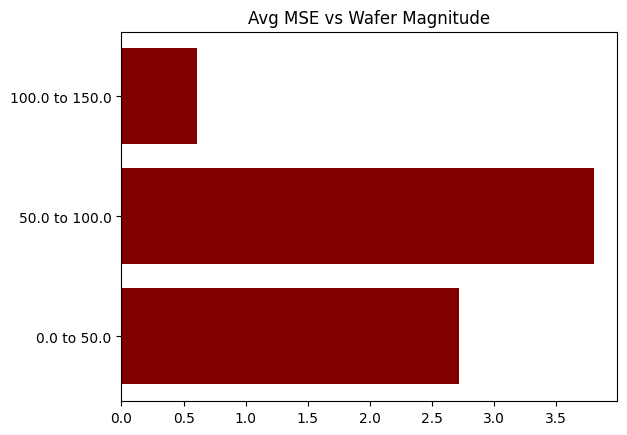

tensor([[ 1.7699,  2.7584,  1.2677,  0.1618,  1.3065],
        [ 1.7699,  2.7584,  1.3328,  0.3343,  1.5298],
        [ 1.7699,  2.7584, 15.5112,  6.2920,  7.3978],
        ...,
        [ 1.7728, -0.6662,  1.4019,  0.0848,  1.2569],
        [ 1.7728, -0.6662,  3.0569,  1.7276,  5.3370],
        [ 1.7728, -0.6662,  1.3821,  0.1870,  1.3944]], grad_fn=<CatBackward0>)

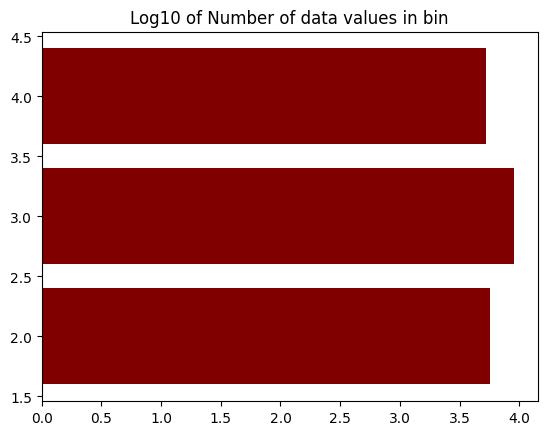

In [16]:
# fine-tune autoencoder
#batch 500


# model_2 = Naive_DAE([48,250,100,16])
model_2 = torch.load('models/dt_2_greater_0_250_100')
test = dt_2[-size_test:,0:48]

optimizer = optim.Adam(model_2.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    break
    losses = []
    
    for i, data_list in enumerate(train_d2_flat):
        model_2.train()
        data = data_list[0]
        v_pred = model_2(data)
        
        batch_loss = loss(data, v_pred,epoch) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = dt_2[-size_test:,0:48]
    model_2.eval()
    test_pred = model_2(data_test)
    batch_test = loss(data_test, test_pred,epoch)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_2.eval()
AE_Stats.gen_all_stats(model_2(dt_2[-size_test:,0:48]),dt_2[-size_test:,0:48],dt_2[-size_test:])


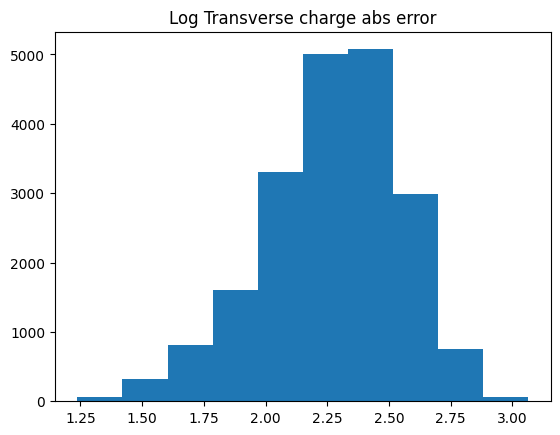

In [20]:
plt.title('Log Transverse charge abs error')
plt.hist(np.log10((torch.sum(torch.abs(model_2(dt_2[-size_test:,0:48])-dt_2[-size_test:,0:48]),dim=1)*std_dt_2+mean_dt_2).detach().numpy()))
plt.show()

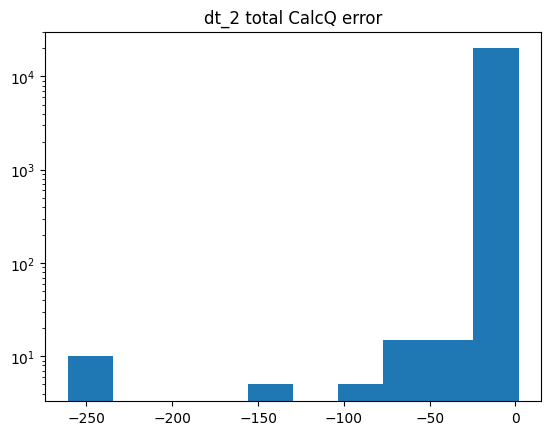

In [41]:
plt.title('dt_2 total CalcQ error')
plt.hist((torch.sum(dt_2[-size_test:,0:48]*std_dt_2+mean_dt_2,dim=1)-torch.sum(model_1(dt_2[-size_test:,0:48])*std_dt_2+mean_dt_2,dim=1)).detach().numpy(),log = True)
plt.show()

MSE 4.250527381896973
Median 0.16046205163002014
Standard Devitaion 24.78887939453125
Average std error 2.5445923805236816
Average % Error of Energy Reconstruction 1.535582423210144


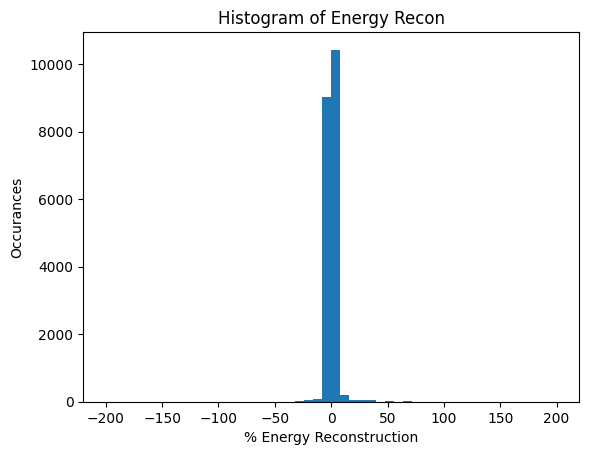

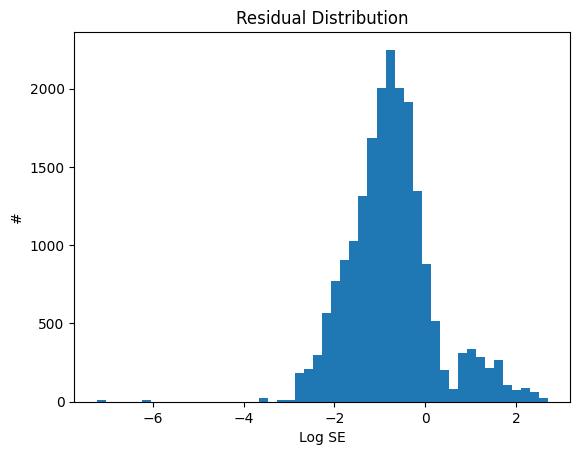

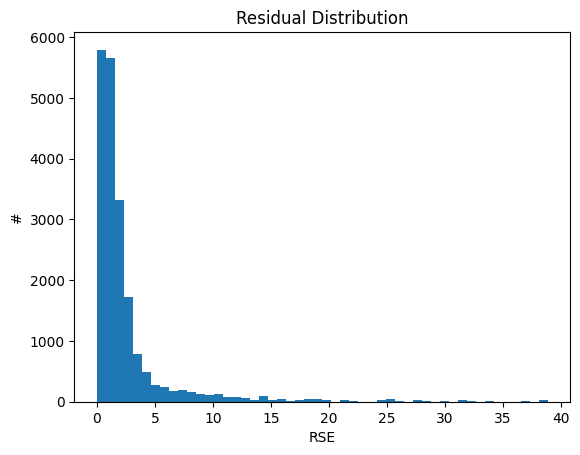

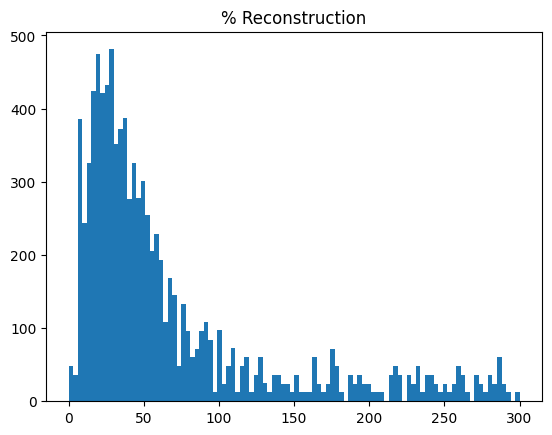

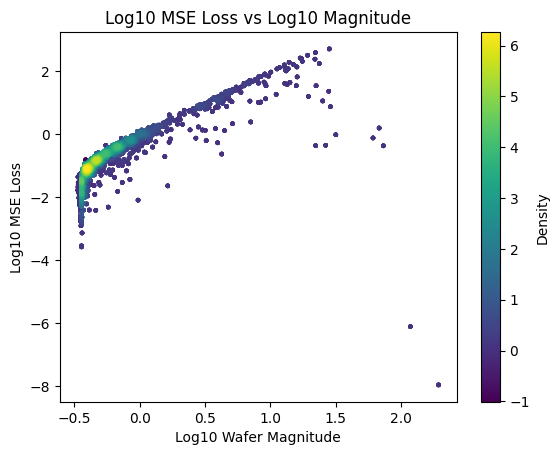

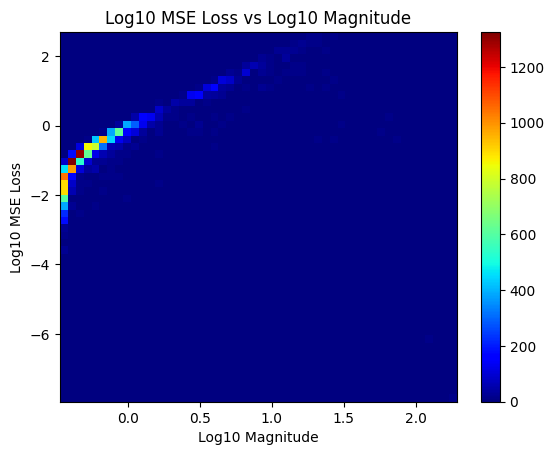

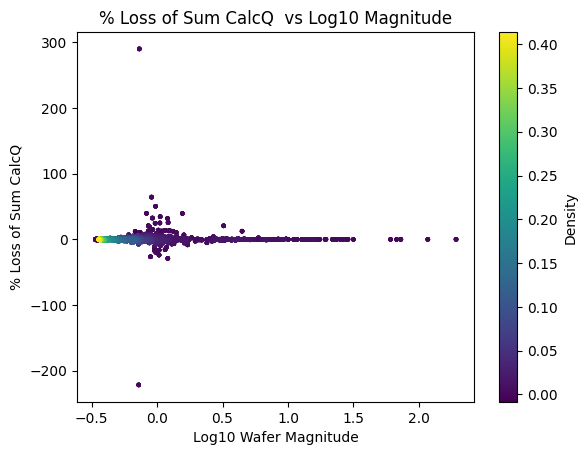

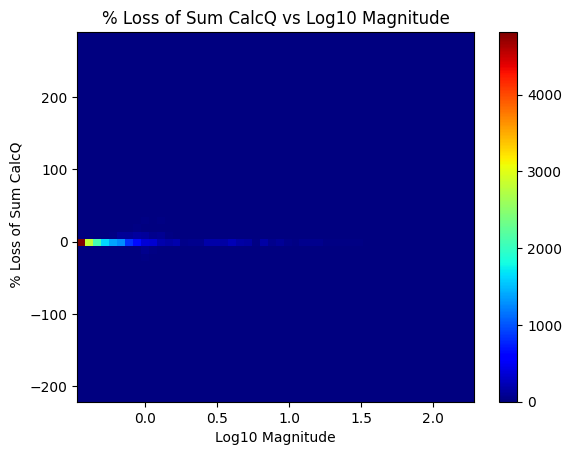

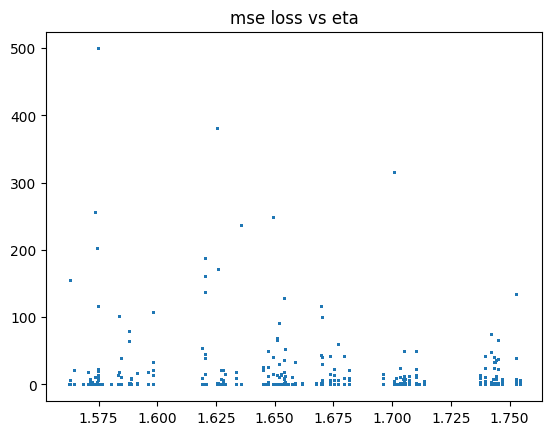

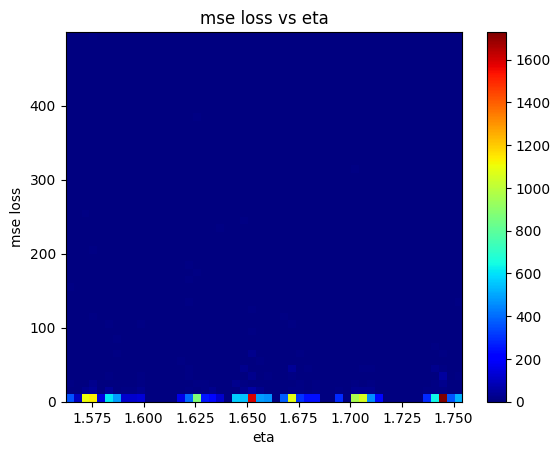

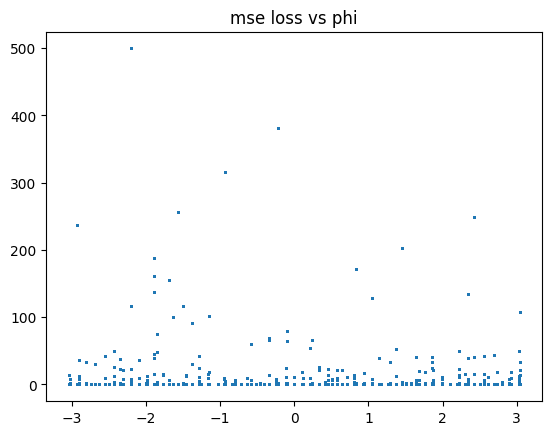

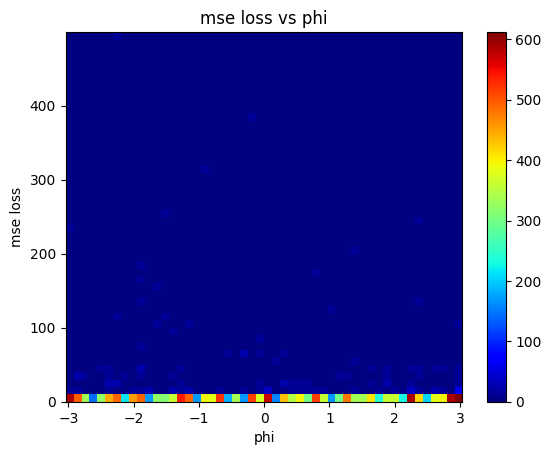

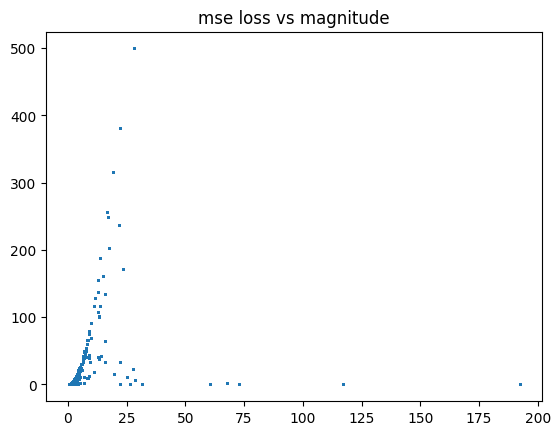

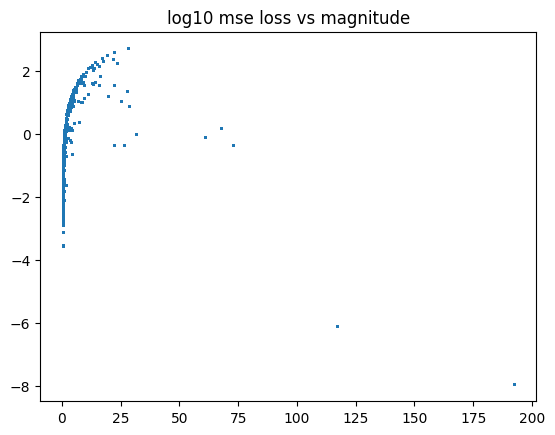

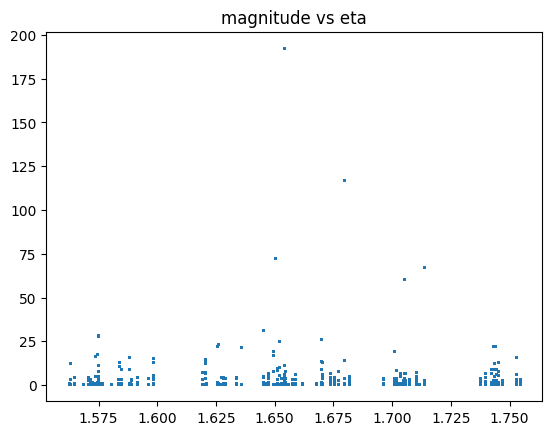

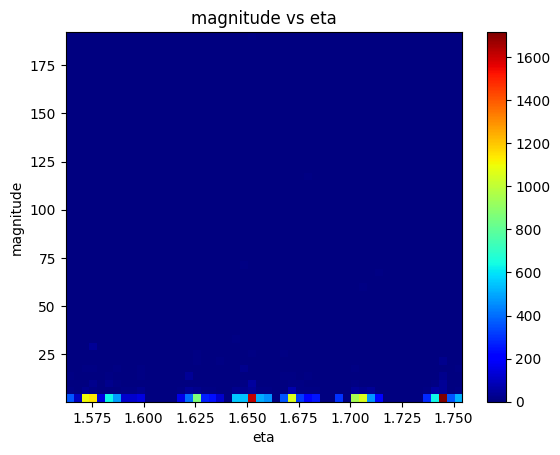

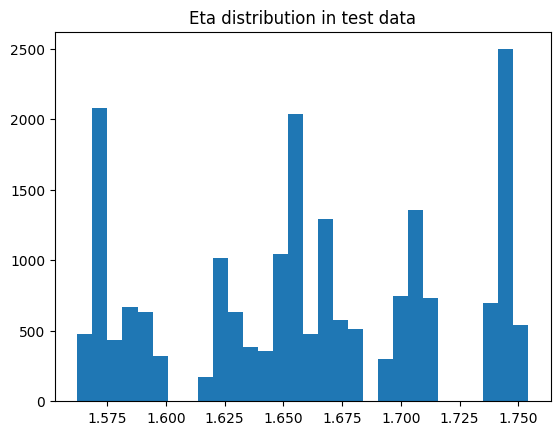

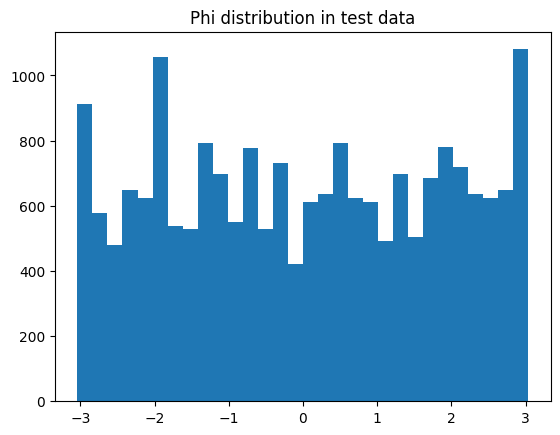

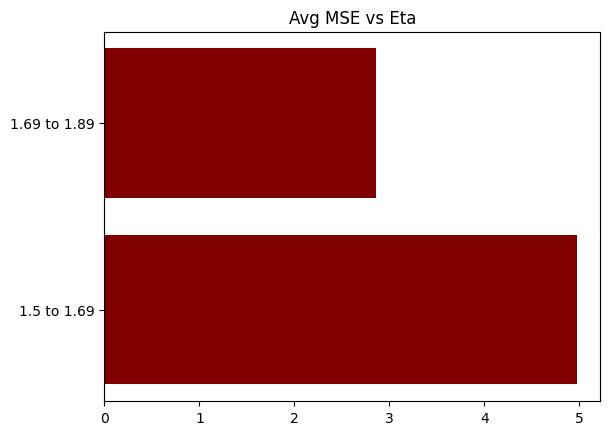

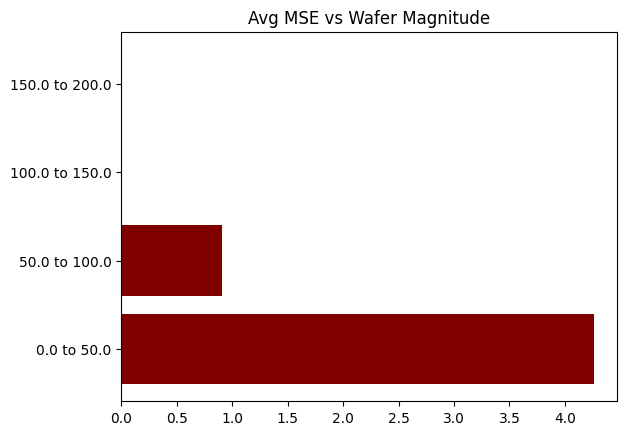

tensor([[ 1.5746, -0.6369,  0.3655,  0.0364,  0.4853],
        [ 1.5746, -0.6369,  0.5466,  0.1275,  0.8871],
        [ 1.5746, -0.6369,  0.8439,  0.0363,  0.7293],
        ...,
        [ 1.6256, -0.8328,  0.3762,  0.0318,  0.4517],
        [ 1.6256, -0.8328,  0.4796,  0.1238,  1.2188],
        [ 1.6256, -0.8328,  0.3576,  0.0077,  0.1743]], grad_fn=<CatBackward0>)

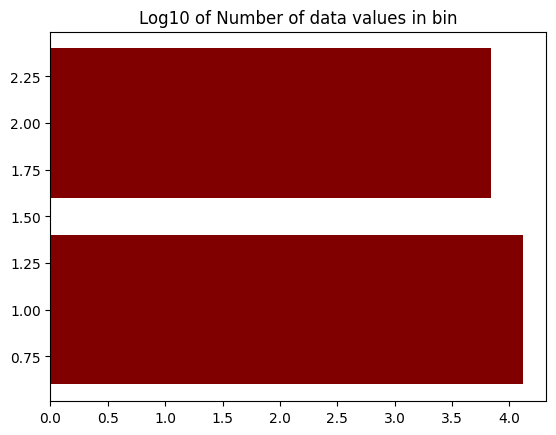

In [18]:
# fine-tune autoencoder
#batch 500


# model_3 = Naive_DAE([48,250,100,16])
model_3 = torch.load('models/dt_3_greater_0_250_100')
test = dt_3[-size_test:,0:48]
optimizer = optim.Adam(model_3.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    break
    losses = []
    
    for i, data_list in enumerate(train_d3_flat):
        model_3.train()
        data = data_list[0]
        v_pred = model_3(data)
        
        batch_loss = loss(data, v_pred,epoch) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = dt_3[-size_test:,0:48]
    model_3.eval()
    test_pred = model_3(data_test)
    batch_test = loss(data_test, test_pred,epoch)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_3.eval()
AE_Stats.gen_all_stats(model_3(dt_3[-size_test:,0:48]),dt_3[-size_test:,0:48],dt_3[-size_test:])


In [61]:
torch.save(model_3,'dt_3_greater_0_250_100')

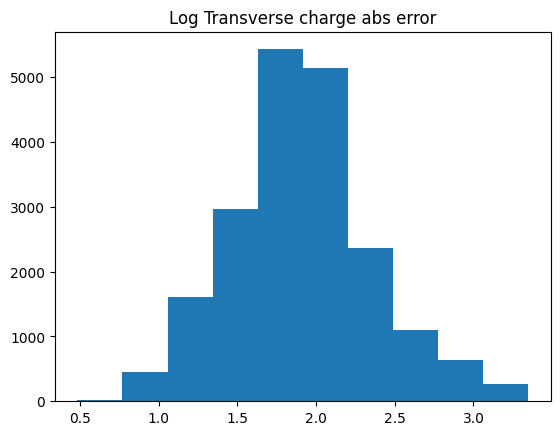

In [19]:
plt.title('Log Transverse charge abs error')
plt.hist(np.log10((torch.sum(torch.abs(model_3(dt_3[-size_test:,0:48])-dt_3[-size_test:,0:48]),dim=1)*std_dt_3+mean_dt_3).detach().numpy()))
plt.show()

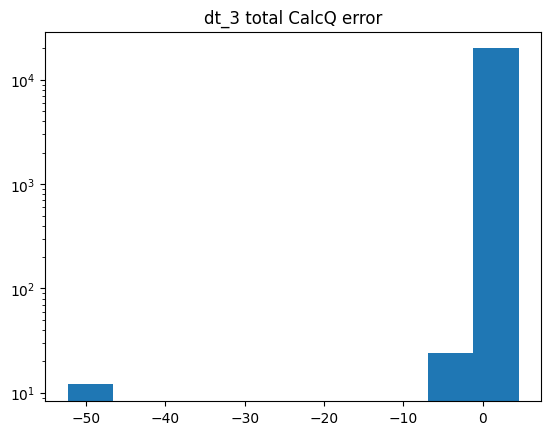

In [42]:
plt.title('dt_3 total CalcQ error')
plt.hist((torch.sum(dt_3[-size_test:,0:48]*std_dt_3+mean_dt_3,dim=1)-torch.sum(model_1(dt_3[-size_test:,0:48])*std_dt_3+mean_dt_3,dim=1)).detach().numpy(),log = True)
plt.show()